# Big Data Mart Sales Problem


### Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

### Hypothesis
In this we have to decide what could be the target variable.
It helps in exploring the dataset.
It is done before seeing the data or we will end up with biased hypothesis.
* sales are good in weekends.
* Location does effect sales.
* Higher sales can be seen during end of the year.
* higher sales can also be in morning and evening.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [135]:
df_train = pd.read_csv(r'C:\Users\tusha\Downloads\bigdatamart_Train.csv')
df_test = pd.read_csv(r'C:\Users\tusha\Downloads\bigdatamart_Test.csv')

In [136]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [137]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [138]:
# from above we can see that Item_Outlet_Sales is present in train but not in test dataset
# its because that the target variable that we have to predict.

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [140]:
#from .info() function it tells that there are missing values in Item_Weight, and Outlet_type. in df_train dataset.
# df_train dataset contains object, integer and folat type datatypes.

In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [142]:
#from .info() function it tells that there are missing values in Item_Weight, and Outlet_Size. in df_test dataset.
# df_test dataset contains object, integer and folat type datatypes.

In [143]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [144]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [145]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [146]:
print(df_train.shape)
print(df_test.shape)
print(df.shape)

(8523, 12)
(5681, 11)
(14204, 12)


In [147]:
# here it can be seen that both the data has same columns but rows are equivalent to train and test.
# now we have to find the missig values.

In [148]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [149]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [150]:
# from this we got to know that in Item_Weight there are 2439 missing values in it.
# from this we got to know that in Outlet_Size there are 4016 missing values in it.
# from this we got to know that in Item_Outlet_Sales there are 5681 missing values in it.

In [151]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [152]:
# from this we got to know that in Item_Weight there are 976 missing values in it.
# from this we got to know that in Outlet_Size there are 1606 missing values in it.

In [153]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [154]:
# it can be seen that Item_Weight has 2439, Outlet_Size has 4016 and Item_Outlet_Sales has 5681 missing values.
# Item_Outlet_Sales is our target variable which is in dataset of df_test.
# We have to impute the missing values in Outlet_Type and Item_Weight while performing the data cleaning

## Univariate analysis

In [155]:
# our target variable is continuous
# Plotting the histogram 

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Item_outlet_Sales Distribution')

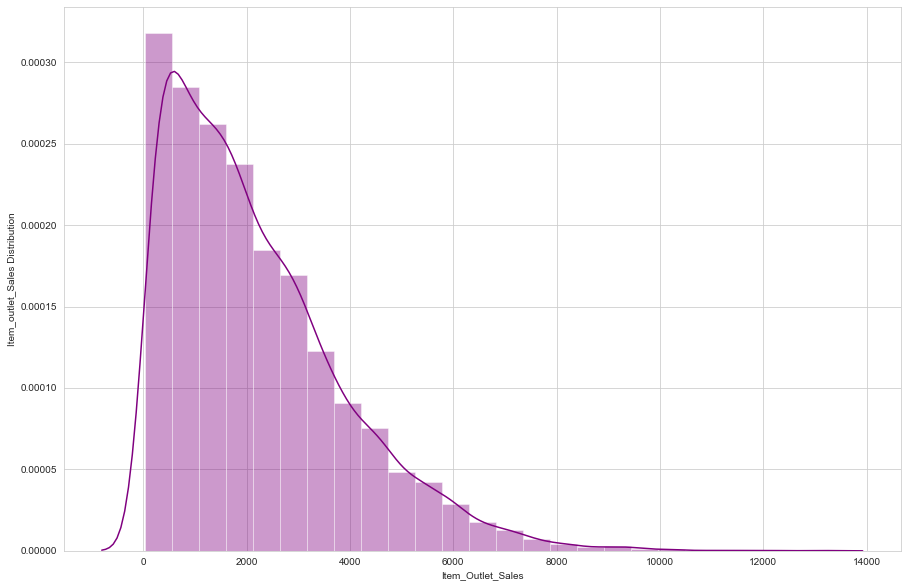

In [156]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.distplot(df.Item_Outlet_Sales, bins = 25, color='purple')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_outlet_Sales Distribution')

In [157]:
print('skewness is:', df.Item_Outlet_Sales.skew())
print('Kurtosis: %f' % df.Item_Outlet_Sales.kurt())

skewness is: 1.1775306028542796
Kurtosis: 1.615877


In [158]:
# from above plot it can be observe that the target variable is skewed towards right. 
# It can be normalized 

In [159]:
print(min(df['Item_Visibility']))

0.0


In [160]:
df['Item_Visibility'].value_counts()[0]

879

In [161]:
# there are 879 dataset which has visibility is given approx zero.
# Now 0 has to be replaced with the average visibility og all the items in dataset.

In [162]:
df['Item_Visibility'] = df['Item_Visibility'].replace({0:df['Item_Visibility'].mean()})

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


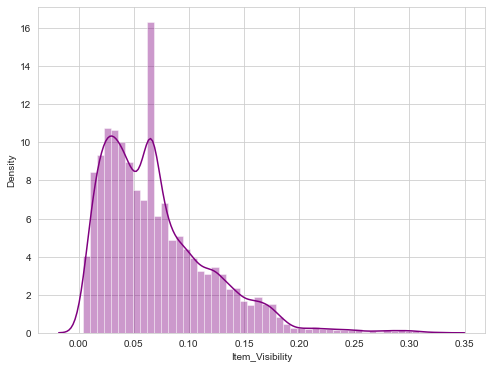

In [163]:

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_Visibility'], color='purple');
sns.despine;

In [164]:
# it can be concluded that most of the item has very low visibility.
# It may be due to the fact that they are kept at the back of any product.
# some product has medium visibility which are kept in side of the rack.
# few product has maximum visibility which can be concluded that it is placed in enterance.

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


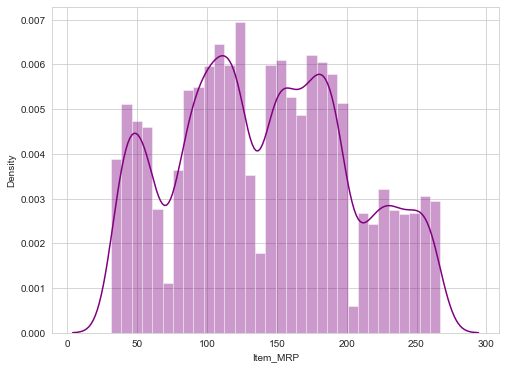

In [165]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_MRP'], color='purple');
sns.despine;

In [166]:
# It can be observed that there are 4 different price ranges which has good features for predition.
# low level price has sufficient products
# mid level price has sufficient products
# medium and higher has more products.

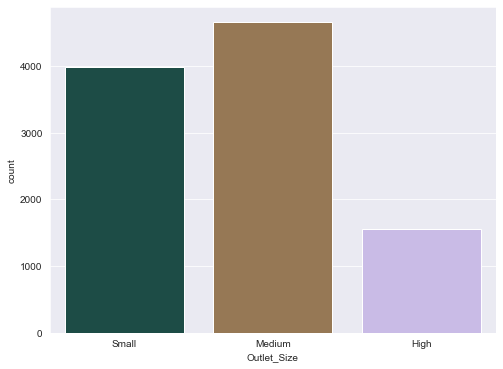

In [167]:

plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Size', data=df, palette="cubehelix", order=['Small', 'Medium', 'High']);
sns.despine;

In [168]:
# three categories has been divided.
# small/low, medium, high

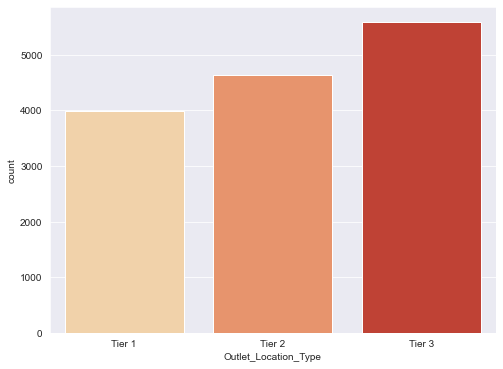

In [169]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Location_Type', data=df, palette="OrRd", order=['Tier 1', 'Tier 2', 'Tier 3']);
sns.despine;

In [170]:
# The distribution of outlets in different city tiers
# it is visible that tier 3 has most no. of shops/outlets.
# tier1 has very less outlets.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

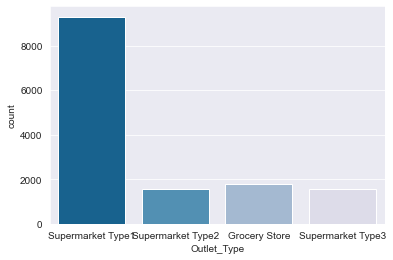

In [171]:
sns.countplot(x='Outlet_Type',data=df, palette="PuBu_r")

In [172]:
# most outlets are of type1
# grocery store are of significant in number.

## Bivariate Analysis

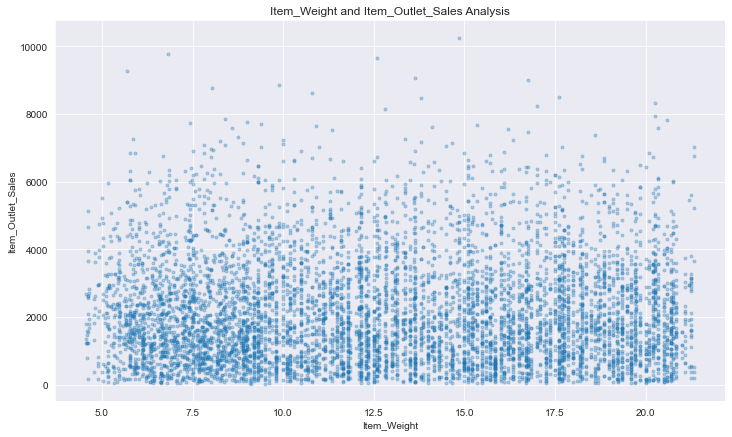

In [173]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.3)

In [174]:
# it is evident that Item_Weight had a low/less co-relation with our target variable.

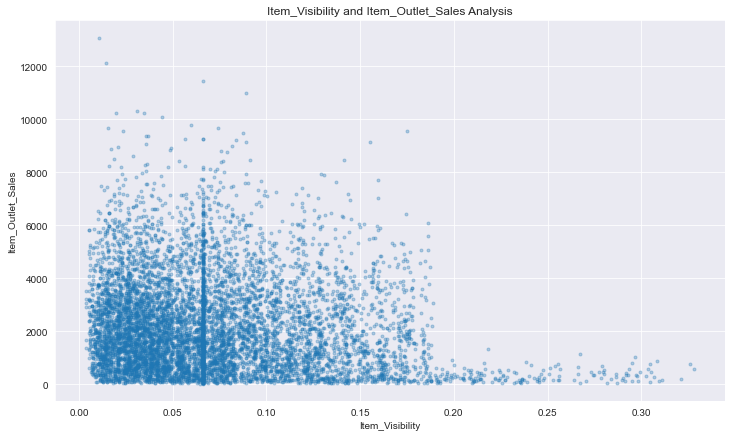

In [175]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Visibility, df["Item_Outlet_Sales"],'.', alpha = 0.3)

In [176]:
# relaton between Item_visibility and Item_Outlet_Sales  has significant co-relation.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

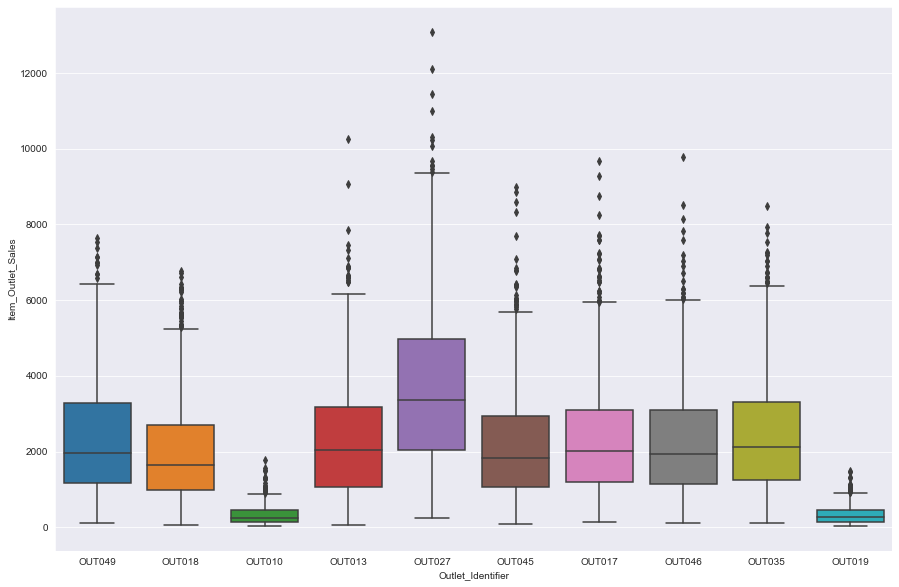

In [177]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

In [178]:
# OUT027 has the maximum outlet sales
# OUT049 and OUT019 are the one having the least outlet sales in all.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

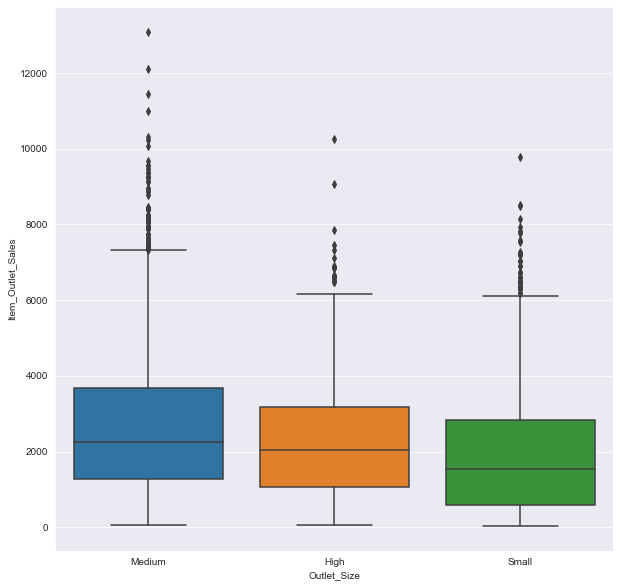

In [179]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

In [180]:
# Outlet_size and item_Outlet_sales have the relation.

## Multivariate Analysis

In [181]:
corr_mat=df.corr()

In [182]:
corr_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017913,0.036236,0.000645,0.014123
Item_Visibility,-0.017913,1.000000,-0.008790,-0.088598,-0.134141
Item_MRP,0.036236,-0.008790,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.088598,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.134141,0.567574,-0.049135,1.000000


In [183]:
# from correlation matrix we can see that there is a strong relation between Outlet_MRP nad Iten_Outlet_Sales.

<AxesSubplot:>

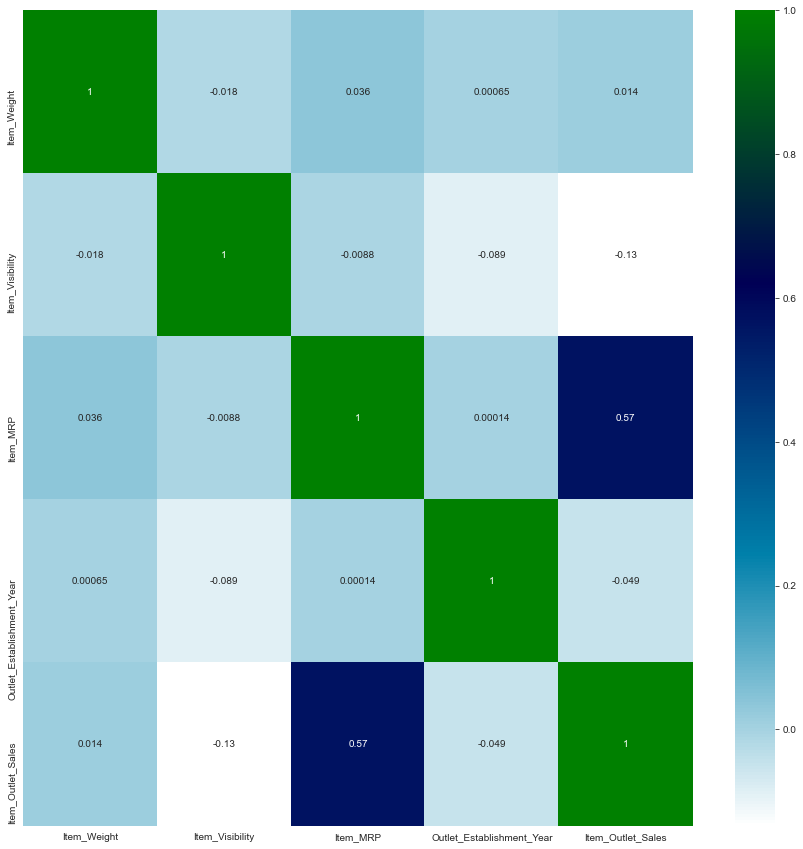

In [184]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,cmap="ocean_r",annot=True)

In [116]:
# from heatmap we can see that there is a strong relation between Outlet_MRP nad Iten_Outlet_Sales.
# it can be seen that the relation is approx linear.

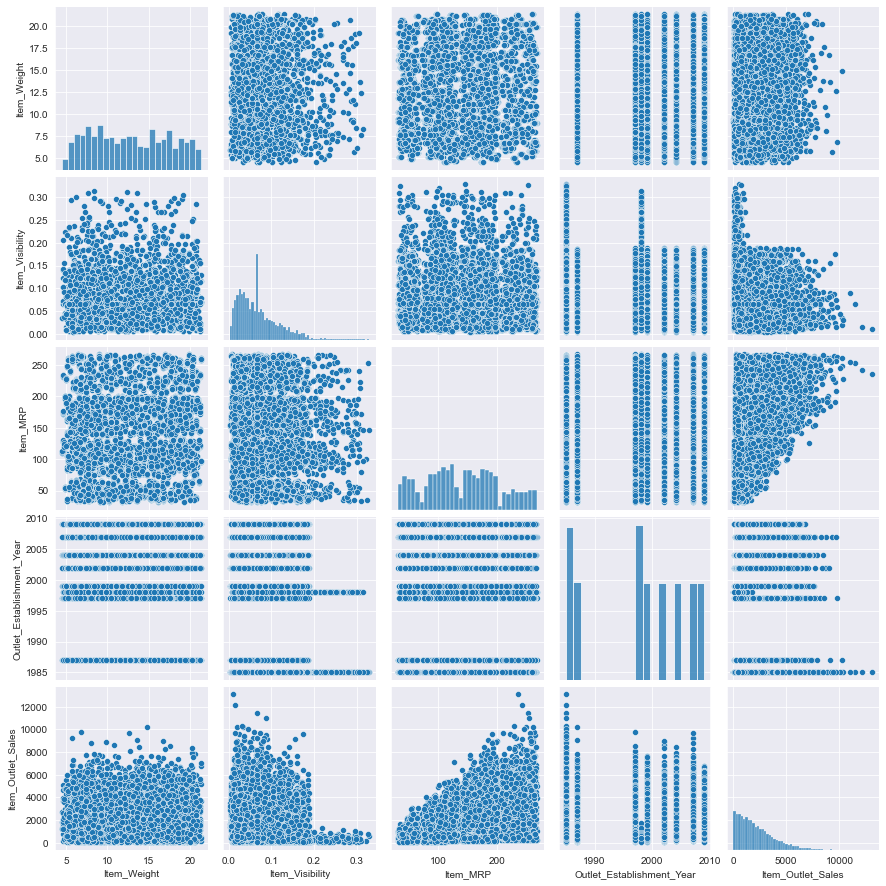

In [185]:
sns.pairplot(df,palette=None)

In [186]:
# pairplot will shows relationship in a dataset.

# Data Pre-processing

### Imputing the mean value for the missing values


In [190]:
mean_weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
print(mean_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [191]:
# the above are the mean values of item weight.

In [193]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]

    if pd.isnull(Weight):
        return mean_weight['Item_Weight'][mean_weight.index == Identifier]
    else:
        return Weight

print('Original #missing: %d'%sum(df['Item_Weight'].isnull()))

df['Item_Weight'] = df[['Item_Weight', 'Item_Identifier']].apply(impute_weight,axis=1).astype(float)

print('Final #missing: %d'%sum(df['Item_Weight'].isnull()))

Original #missing: 2439
Final #missing: 0


In [194]:
# initially the missing values for Item _weight was 2439 and now its zero.

In [195]:
#Import mode function:
from scipy.stats import mode 
#Determing the mode for each
size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [196]:
# from this we see that the size of outlet of grocery is small, supermarket of type 1 are small
# and supermarket of type2 and type3 are medium.

In [213]:

def imputeOutletSize(cols):
    Type = cols[0]
    Size = cols[1]
  
    if pd.isnull(Size):
        return outletSizeMode[Type]
    else:
        return Size
df['Outlet_Size'] = df[['Outlet_Type', 'Outlet_Size']].apply(imputeOutletSize, axis=1)

In [216]:
# now imputing the Outlet_size

In [214]:
df['Outlet_Size'].head(20)

0     Medium
1     Medium
2     Medium
3      Small
4       High
5     Medium
6       High
7     Medium
8      Small
9      Small
10    Medium
11     Small
12    Medium
13     Small
14      High
15     Small
16    Medium
17    Medium
18    Medium
19     Small
Name: Outlet_Size, dtype: object

In [217]:
# all the missing values has been fille with mode value.

In [215]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [218]:
# Outlet_size missing values have been filled.

In [219]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].replace(0, np.NaN)
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mode()[0], inplace = True)

In [220]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [222]:
#Fat_Content showing redudancy of differnt types
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [224]:
#Now replace LF by Low Fat ,low fat by lf,reg by Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [228]:

from sklearn.preprocessing import LabelEncoder

df.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio
0,156,422,0,1096,4,7567,9,4,1,0,1,2540,4,1096
1,8,78,1,1435,14,632,3,8,1,2,2,422,0,1435
2,662,572,0,1171,10,3897,9,4,1,0,1,1639,4,1171
3,1121,596,1,7352,6,5626,0,3,2,2,0,670,5,7352
4,1297,397,0,7352,9,848,1,1,0,2,1,865,7,7352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,443,1,717,13,3881,8,2,2,0,1,835,6,717
14200,308,279,1,11820,15,5069,3,8,1,2,2,835,0,11820
14201,1426,435,0,8009,8,3196,7,5,2,1,1,835,3,8009
14202,521,540,1,7352,3,6626,2,7,2,1,1,835,1,7352


### One hot encoding

In [229]:
# one hot encoding

df = pd.get_dummies(df)

print(df.shape)

(14204, 1604)


# Modelling

In [251]:
# splitting the data into dependent and independent variables

X = df.drop('Item_Outlet_Sales', axis = 1)
y = df.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 1603)
(14204,)


In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state= 41)

## Linear regression Model

In [253]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [254]:
# Predicting the test set results
y_pred = regressor.predict(X_test)


In [255]:
y_pred

array([1036.  ,  135.75, 3558.5 , ...,  888.  ,  650.75, 1079.  ])

In [259]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [260]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

39.59

In [261]:
r2_score(y_train, regressor.predict(X_train))


0.39594243016076436

In [264]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring=None)

In [265]:
print(np.sqrt(np.abs(cv_score)))

[3.43919846e-01 3.57485314e-01 3.36356963e-01 1.08235987e+09
 1.17046147e+07]


In [266]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1128


## Decision Tree Regression

In [267]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [268]:

# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1717.08590831,  542.00292115, 2741.18585584, ..., 1190.71816739,
        448.43690293, 1556.76946277])

In [269]:

tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.31

In [270]:
r2_score(y_train, regressor.predict(X_train))

0.31165090634390236

In [272]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring=None)
print(np.sqrt(np.abs(cv_score)))

[0.54349162 0.54630955 0.54817083 0.54051593 0.56302741]


In [273]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1204


## Random Forest 

In [274]:

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [275]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1695.96824319,  535.41104131, 2467.92800061, ..., 1159.63035887,
        528.62209319, 1514.54010395])

In [276]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.33

In [277]:
r2_score(y_train, regressor.predict(X_train))

0.32755161522186726

In [278]:

import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring=None)
print(np.sqrt(np.abs(cv_score)))

[0.55514454 0.54804039 0.55041614 0.53815864 0.56383492]


In [279]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1190


## It can be seen that Linear Regression Model gives the best score.

## Therefore Linear Regression is the best model of all.

## Saving the model

In [292]:
import joblib
joblib.dump(r2_score,'BigData.pkl')      #dump is used to serialize the model



['BigData.pkl']